In [32]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [33]:
Image_size=256
batch_size=32

In [34]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/Potato Leaf Disease/PlantVillage",
   shuffle=True,
   image_size=(Image_size,Image_size) ,
   batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [35]:
classes=dataset.class_names

In [36]:
for img_btch ,lbl_btch in dataset.take(3):
  print(img_btch.shape)
  print(lbl_btch)


(32, 256, 256, 3)
tf.Tensor([0 1 0 2 1 1 1 1 0 0 1 1 0 2 1 0 1 1 1 1 2 0 1 1 0 2 0 0 1 1 0 1], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 2 1 1 0 1 1 0 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 2 1 1 1 2 1 1 0 0 0 0 1 0 0], shape=(32,), dtype=int32)


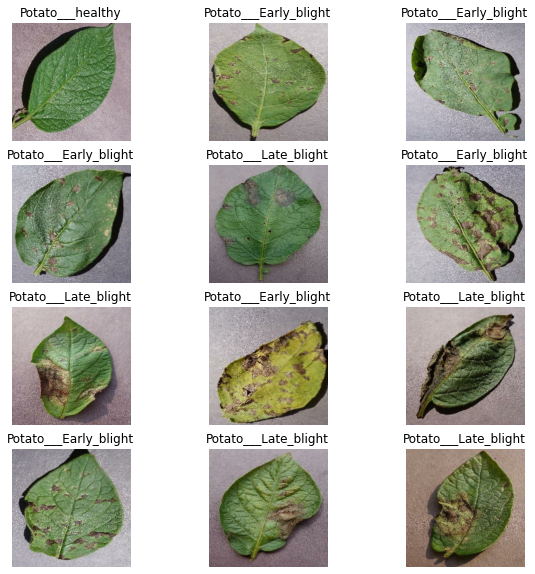

In [37]:
plt.figure(figsize=(10,10))
for img_btch ,lbl_btch in dataset.take(3):
  for i in range(12):
    ax=plt.subplot(4,3,i+1)
    plt.title(dataset.class_names[lbl_btch[i]])
    plt.imshow(img_btch[i].numpy().astype('uint8'))
    plt.axis('off')

In [38]:
train_size=len(dataset)*0.8
train_ds=dataset.take(round(train_size))
len(train_ds)

54

In [39]:
def get_split_data(df,train_per=0.8,val_per=0.1,test_per=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    df.shuffle(shuffle_size,seed=3)
  train_size=round(len(df)*train_per)
  val_size=round(len(df)*val_per)
  train_ds=df.take(round(train_size))
  train_val_ds=df.skip(round(train_size)).take(round(val_size))
  test_ds=df.skip(round(train_size)).skip(round(val_size))
  return train_ds,train_val_ds,test_ds


In [40]:
train_ds,train_val_ds,test_ds=get_split_data(dataset)

In [41]:
resize_rescale= tf.keras.Sequential([
layers.Resizing(256,256),
layers.Rescaling(1.0/255)
])

In [42]:
data_augment=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2)
])

In [43]:
input_shape = (32,256,256,3)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [45]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

call_back_hist= model.fit(train_ds,
    batch_size=32,
    validation_data=train_val_ds,
    verbose=1,
    epochs=15)

Epoch 1/15
54/54 [==============================] - 12s 162ms/step - loss: 0.8982 - accuracy: 0.4809 - val_loss: 0.8545 - val_accuracy: 0.4955
Epoch 2/15
54/54 [==============================] - 10s 170ms/step - loss: 0.7022 - accuracy: 0.6453 - val_loss: 0.6427 - val_accuracy: 0.6384
Epoch 3/15
54/54 [==============================] - 10s 185ms/step - loss: 0.4294 - accuracy: 0.8200 - val_loss: 0.5012 - val_accuracy: 0.7768
Epoch 4/15
54/54 [==============================] - 9s 152ms/step - loss: 0.3459 - accuracy: 0.8675 - val_loss: 0.2982 - val_accuracy: 0.8661
Epoch 5/15
54/54 [==============================] - 9s 158ms/step - loss: 0.2643 - accuracy: 0.8947 - val_loss: 0.3353 - val_accuracy: 0.8438
Epoch 6/15
54/54 [==============================] - 8s 136ms/step - loss: 0.2278 - accuracy: 0.9045 - val_loss: 0.1770 - val_accuracy: 0.9196
Epoch 7/15
54/54 [==============================] - 9s 159ms/step - loss: 0.1428 - accuracy: 0.9473 - val_loss: 0.1660 - val_accuracy: 0.9196
Epo

In [46]:
model.evaluate(test_ds)

7/7 [==============================] - 5s 29ms/step - loss: 0.0722 - accuracy: 0.9700


[0.07219993323087692, 0.9700000286102295]

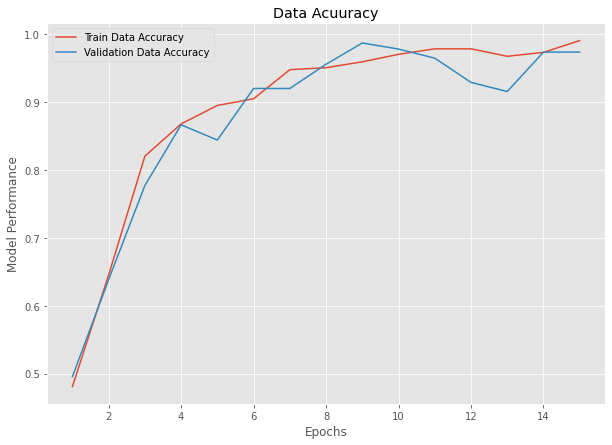

In [47]:
train_data_acc=call_back_hist.history['accuracy']
val_data_acc=call_back_hist.history['val_accuracy']

with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.plot(np.arange(1,16),train_data_acc,label="Train Data Accuracy")
  plt.plot(np.arange(1,16),val_data_acc,label="Validation Data Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Model Performance")
  plt.title("Data Acuuracy")
  plt.legend()
  plt.show()

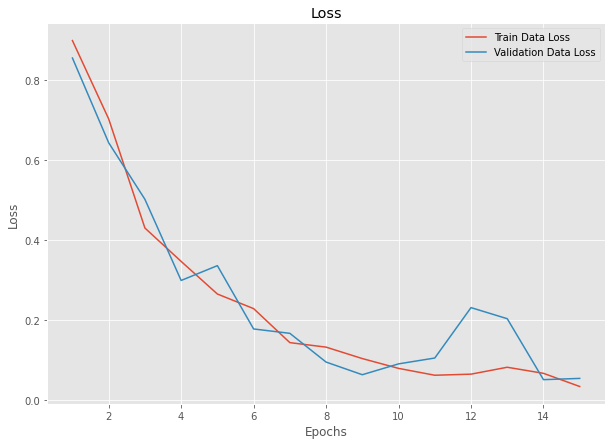

In [48]:
train_data_loss=call_back_hist.history['loss']
val_data_loss=call_back_hist.history['val_loss']

with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.plot(np.arange(1,16),train_data_loss,label="Train Data Loss")
  plt.plot(np.arange(1,16),val_data_loss,label="Validation Data Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss")
  plt.legend()
  plt.show()

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 110ms/step
predicted label: Potato___Early_blight


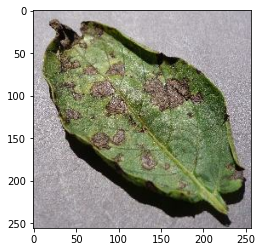

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])

In [51]:
model.save("model_1.h5")